## EDA (Análisis Exploratorio de los Datos)

#### *El presente análisis tiene la finalidad de determinar el Modelo de Clasificación que mejor se ajuste a un Sistema de Recomendación de Películas por Similaridad.*




#### **Indice**
1. Introducción 
2. Estadística Descriptiva
3. Analisis y visualización


##### 1. Introducción

El *Análisis Exploratorio de Datos (EDA)* desempeña un papel fundamental en este proyecto de sistema de recomendación de videojuegos para usuarios. A través del EDA, buscamos comprender los datos disponibles, identificar patrones y tendencias, detectar valores atípicos y evaluar la calidad de los datos. Estos conocimientos nos permitirán tomar decisiones informadas durante el desarrollo del modelo de recomendación y asegurar que nuestro sistema sea efectivo y preciso.

##### 2. Estadística Descriptiva

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
#Cargar los archivos Parquet
ruta_df_steam_games = 'ETL/output_steam_games_trans.parquet'
df_steam_games = pd.read_parquet (ruta_df_steam_games)

ruta_df_user_review_sentiment_analysis = 'ETL/australian_user_reviews_sentiment_analysis.parquet'
df_user_reviews = pd.read_parquet(ruta_df_user_review_sentiment_analysis)

ruta_data_items_resultante = 'ETL/users_items_final.parquet'
df_users_items = pd.read_parquet(ruta_data_items_resultante)

Descripción inicial de los datos

a. Steam_games

In [46]:
df_steam_games.head(5)

,publisher,genres,app_name,title,price,early_access,id,developer,release_year
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018
1,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018
2,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018
3,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018
4,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140.0,Kotoshiro,2018


In [47]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70704 entries, 0 to 70703
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     70704 non-null  object 
 1   genres        70704 non-null  object 
 2   app_name      70704 non-null  object 
 3   title         70704 non-null  object 
 4   price         63523 non-null  float64
 5   early_access  70704 non-null  bool   
 6   id            70702 non-null  float64
 7   developer     70704 non-null  object 
 8   release_year  70704 non-null  Int64  
dtypes: Int64(1), bool(1), float64(2), object(5)
memory usage: 4.5+ MB


In [48]:
df_steam_games.describe()

,price,id,release_year
count,63523.000000,7.070200e+04,70704.0
mean,9.486563,4.615469e+05,2015.229167
std,16.410164,1.740517e+05,2.790493
min,0.490000,1.000000e+01,1983.0
25%,2.990000,3.405700e+05,2015.0
50%,4.990000,4.552100e+05,2016.0
75%,9.990000,5.970700e+05,2017.0
max,995.000000,2.028850e+06,2021.0


b. User_reviews

In [49]:
df_user_reviews.head(5)

,user_id,user_url,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2,2011-11-05,1250,1
1,js41637,http://steamcommunity.com/id/js41637,2,2014-06-24,251610,1
2,evcentric,http://steamcommunity.com/id/evcentric,2,NaT,248820,1
3,doctr,http://steamcommunity.com/id/doctr,2,2013-10-14,250320,1
4,maplemage,http://steamcommunity.com/id/maplemage,2,2014-04-15,211420,1


In [50]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             25458 non-null  object
 1   user_url            25458 non-null  object
 2   sentiment_analysis  25458 non-null  int64 
 3   posted              25458 non-null  object
 4   item_id             25458 non-null  object
 5   recommend           25458 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


Estadísticas descriptivas

In [51]:
df_user_reviews.describe()

,sentiment_analysis,recommend
count,25458.000000,25458.000000
mean,1.818760,0.889426
std,0.566571,0.313610
min,0.000000,0.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,1.000000
max,2.000000,1.000000


b. Users_items

In [52]:
df_users_items.head(5)

,user_id,steam_id,user_url,item_id,item_name,playtime_forever
0,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6
1,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0
2,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7
3,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0
4,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0


In [53]:
df_users_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   steam_id          object
 2   user_url          object
 3   item_id           int32 
 4   item_name         object
 5   playtime_forever  int64 
dtypes: int32(1), int64(1), object(4)
memory usage: 213.8+ MB


Estadísticas descriptivas

In [54]:
df_users_items.describe()

,item_id,playtime_forever
count,5.094105e+06,5.094105e+06
mean,1.783916e+05,9.905511e+02
std,1.318516e+05,5.414297e+03
min,1.000000e+01,0.000000e+00
25%,3.445000e+04,0.000000e+00
50%,2.144200e+05,3.400000e+01
75%,2.664300e+05,3.550000e+02
max,5.307200e+05,6.427730e+05


Los resúmenes estadísticos brindan información sobre las características numéricas de cada columna en tus conjuntos de datos. Aquí hay una interpretación general:

**a. Steam Games**
- Price:

Count: Hay 63,523 registros.

Mean: El precio promedio de los juegos es de alrededor de $9.49.

Std: La desviación estándar es de $16.41, lo que indica una variabilidad considerable en los precios.

Min: El juego más económico cuesta $0.49.

Max: El juego más costoso alcanza los $995.

- ID:

Count: Hay 70,704 IDs.

Mean: La media de los ID es de 461,546.

Std: La desviación estándar es de 174,052, lo que muestra una dispersión considerable.

Min y Max: El ID más pequeño es 10 y el más grande es 2,028,850.

- Release Year:

Count: Hay 70,704 registros.

Mean: La media indica que la mayoría de los juegos se lanzaron en el año 2015.

Std: La desviación estándar es de 2.79, lo que sugiere que la mayoría de los juegos se lanzaron en un rango cercano a 2015.

Min y Max: El juego más antiguo en el conjunto de datos se lanzó en 1983 y el más reciente en 2021.

**b. User Reviews**
- Sentiment Analysis:

Count: Hay 25,458 registros.

Mean: El puntaje promedio de análisis de sentimientos es de aproximadamente 1.82, lo que puede sugerir una tendencia positiva en las reseñas.

Std: La desviación estándar indica la variabilidad en los puntajes.

- Recommend:

Count: Mismo número de registros que Sentiment Analysis.

Mean: El promedio de recomendación es 0.89, lo que indica una tendencia alta hacia la recomendación positiva.

Std: La desviación estándar muestra la variabilidad en las recomendaciones.

**c. Users Items**
- Item ID:

Count: Hay 5,094,105 registros.

Mean: El ID promedio es aproximadamente 178,391.

Std: La desviación estándar indica la variabilidad de los IDs.

Min y Max: El ID más pequeño es 10 y el más grande es 530,720.

- Playtime Forever:

Count: Mismo número de registros que Item ID.

Mean: El tiempo de juego promedio es de aproximadamente 990 segundos.

Std: La desviación estándar muestra la variabilidad en las horas de juego.

Min y Max: La menor cantidad de tiempo jugado es 0 segundos y la máxima es aproximadamente 642,773 segundos.


3. Análisis y visualización.

Ejemplo de un gráfico simple para los géneros de los juegos.

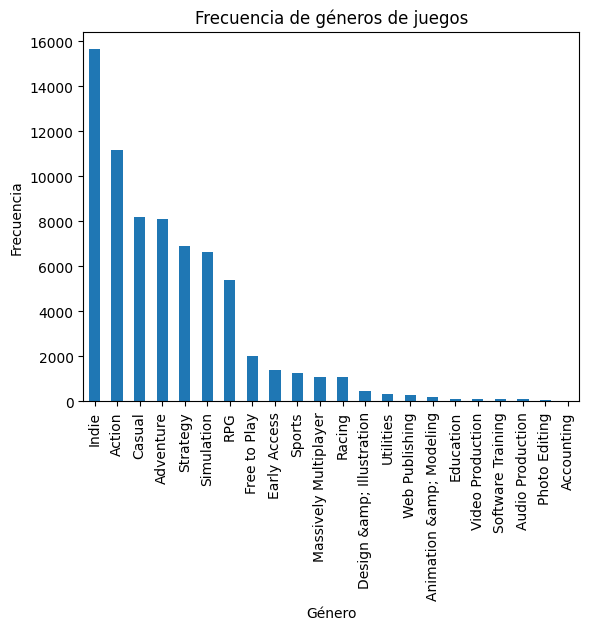

In [55]:
df_steam_games['genres'].value_counts().plot(kind='bar')
plt.title('Frecuencia de géneros de juegos')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

Gráfico de Dispersión de Precios en Steam Games para detectar 'outliers'.

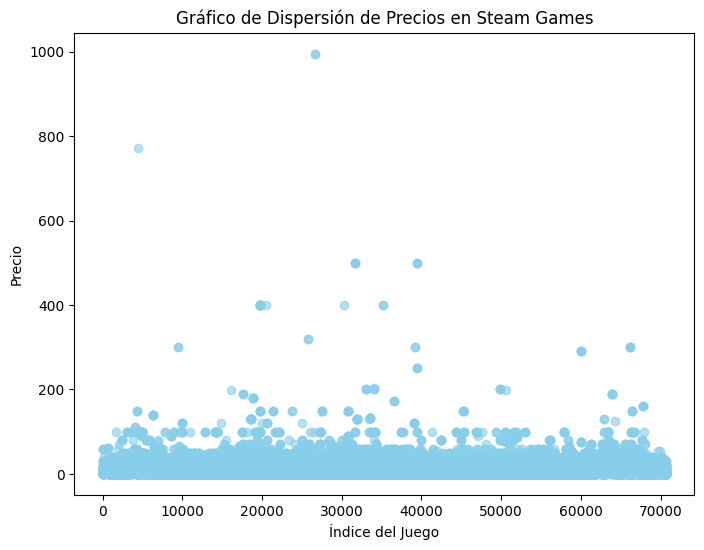

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(df_steam_games.index, df_steam_games['price'], color='skyblue', alpha=0.6)
plt.title('Gráfico de Dispersión de Precios en Steam Games')
plt.xlabel('Índice del Juego')
plt.ylabel('Precio')
plt.show()

Gráfico de barras con el total de horas jugadas en cada género.

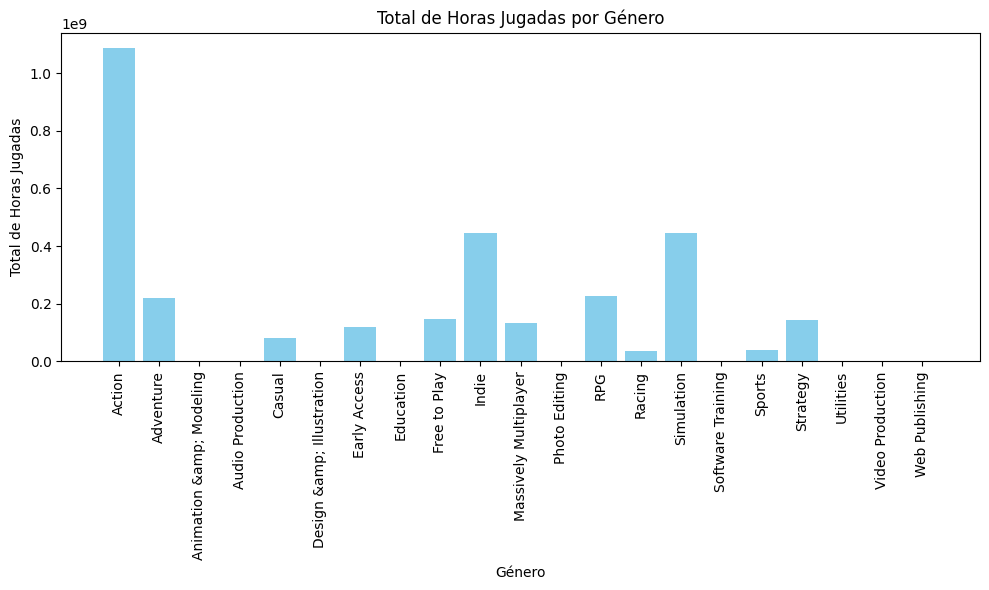

In [57]:
summary_df = pd.read_parquet('DATOS/summary_df.parquet')

# Obtener los datos para el gráfico
generos = summary_df['Género']
horas_jugadas = summary_df['Total_Horas_Jugadas']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(generos, horas_jugadas, color='skyblue')
plt.title('Total de Horas Jugadas por Género')
plt.xlabel('Género')
plt.ylabel('Total de Horas Jugadas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()